In [2]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *
from os import listdir
from os.path import isfile, join
from utils.tools import *
import statistics as stat
path=r"C:\Users\cjang\Desktop\Kyler_Speed_Circuit\data\\"
path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
path_files

['DE_40_10_60.mpt',
 'DE_40_11_60.mpt',
 'DE_40_12_60.mpt',
 'DE_40_13_60.mpt',
 'DE_40_14_60.mpt',
 'DE_40_15_60.mpt',
 'DE_40_1_30.mpt',
 'DE_40_2_60.mpt',
 'DE_40_3_60.mpt',
 'DE_40_4_60.mpt',
 'DE_40_5_60.mpt',
 'DE_40_6_60.mpt',
 'DE_40_7_60.mpt',
 'DE_40_8_60.mpt',
 'DE_40_9_60.mpt',
 'DE_49_1_30.mpt',
 'DE_49_2_30.mpt',
 'DE_49_3_30.mpt',
 'DE_49_4_30.mpt',
 'DE_49_5_30.mpt',
 'DE_49_6_30.mpt',
 'DE_49_7_30.mpt',
 'DE_49_8_30.mpt',
 'DE_49_9_30.mpt',
 'DE_57_6_60.mpt']

No handles with labels found to put in legend.


,f,re,im
0,1.000019e+06,61.501774,71.066010
1,8.912467e+05,69.844292,68.454613
2,7.943327e+05,77.924400,66.218971
3,7.079498e+05,85.496017,64.284813
4,6.309568e+05,92.851799,62.459873
...,...,...,...
89,3.546531e+01,1552.970600,5161.328100
90,3.162955e+01,1696.565800,5671.524400
91,2.817007e+01,1857.839400,6239.362800
92,2.510444e+01,2032.165400,6861.716300


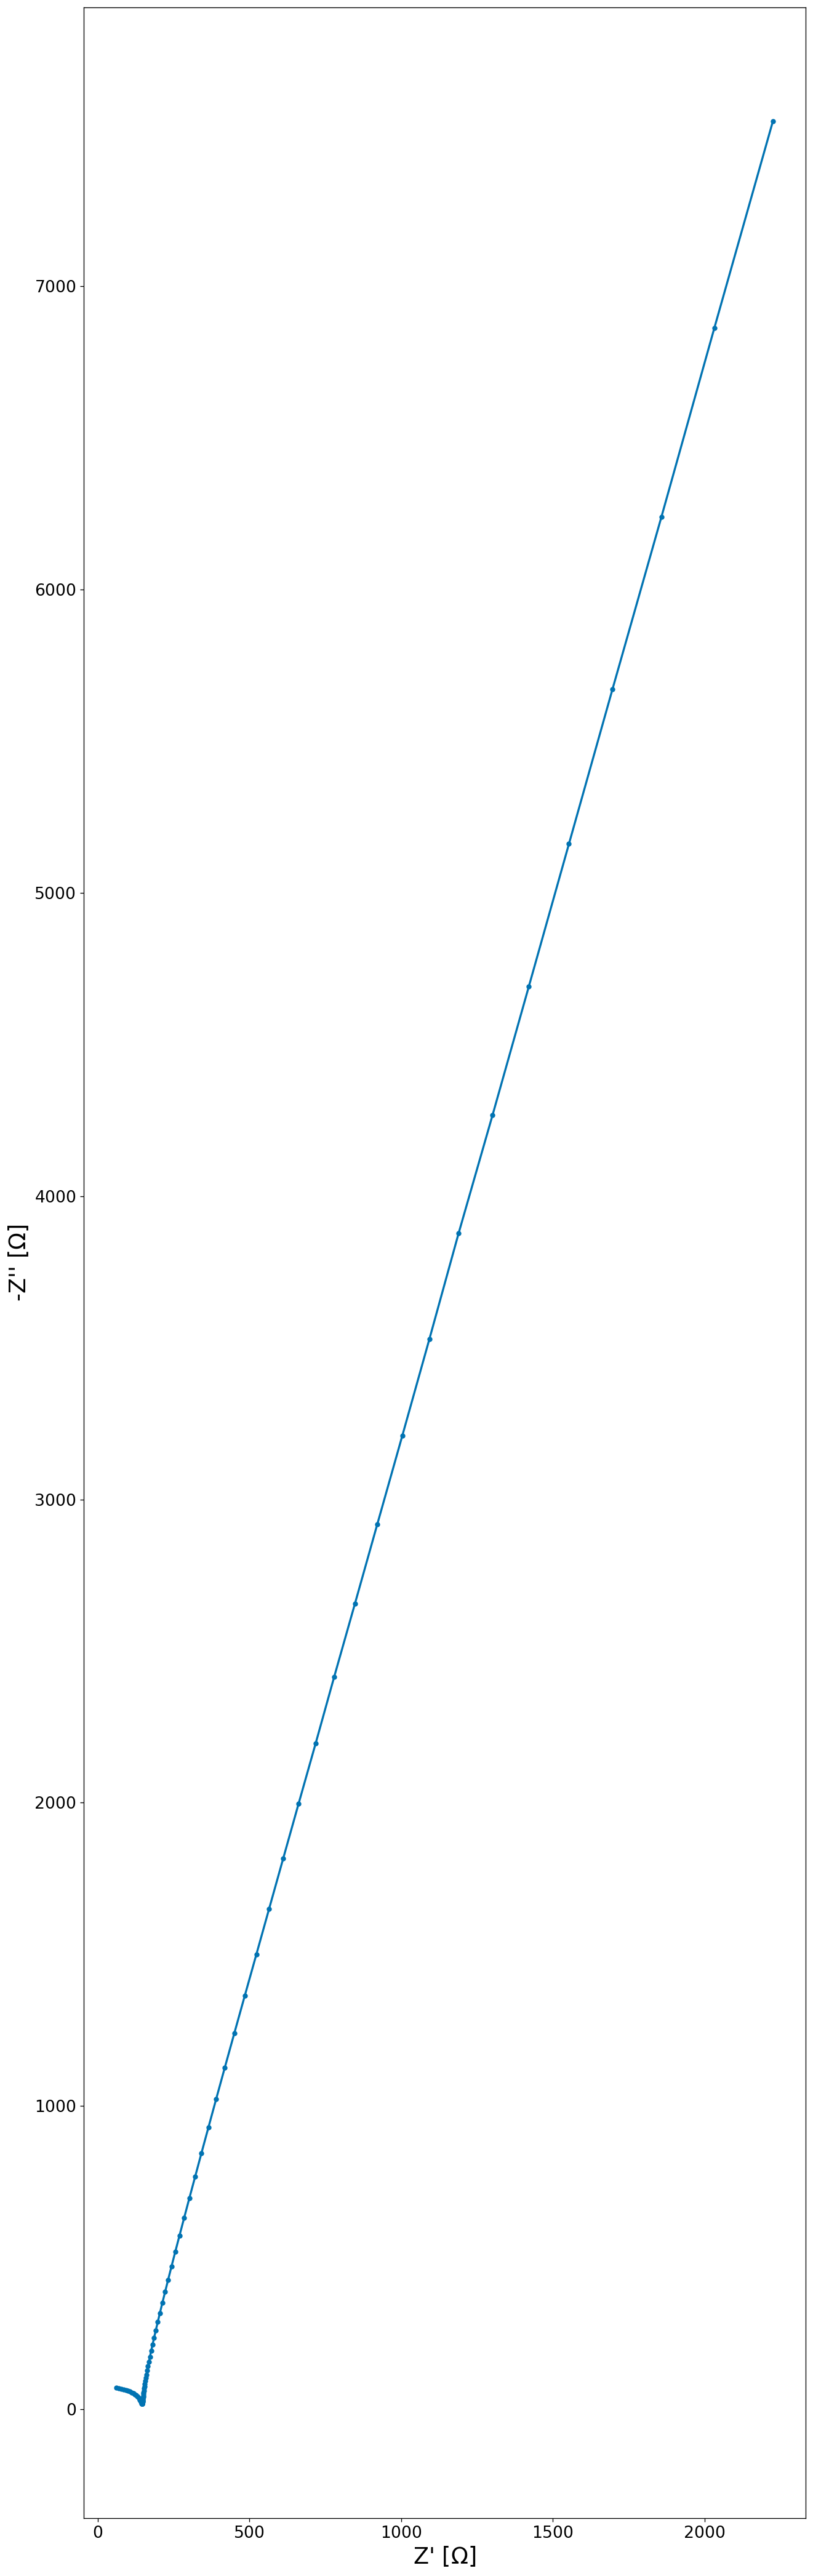

In [3]:
ex_mpt = mpt_data(path,['DE_40_9_60.mpt'])
ex_mpt.set_new_gph_dims(20,100)
ex_mpt.mpt_plot()
c = ex_mpt.df_raw.iloc[:,0:3]
#for cols in c.columns.tolist()[1:]:
 #   c = c.ix[c[cols] > 0]
c

In [4]:
mask_list = [ex_mpt.fast_mask(), ex_mpt.masker(), ex_mpt.masker0()]
mask_list

[[1000018.6, 707.50946],
 [1000018.6, 70.83874499999999],
 [1000018.6, 44.671219]]

In [5]:
masked_mpt = mpt_data(path, ['DE_40_9_60.mpt'], mask =[1000018.6, 7007.50946])
masked_mpt.guesser(path)

MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.8176757
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.8176757
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.8176757
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194913.7516953
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.8176757
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.81766991
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.817675732
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.817936502
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.817674942
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.82252696
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.817675687
MPT FILE :  DE_40_9_60.mpt  ERROR:  33194859.81772348
MPT FILE :  DE_40_9_60.mpt  ERROR:  5762079489204.941
MPT FILE :  DE_40_9_60.mpt  ERROR:  82322829183673.4
MPT FILE :  DE_40_9_60.mpt  ERROR:  1072614252187.2065
MPT FILE :  DE_40_9_60.mpt  ERROR:  10099174690141.812
MPT FILE :  DE_40_9_60.mpt  ERROR:  32891545966943.85
MPT FILE :  DE_40_9_60.mpt  ERROR:  3388818316527.8213
MPT FILE :  DE_40_9_60.mpt 

,file,fit_R,fit_Rs,fit_n,fit_Q,fit_R2,fit_n2,fit_Q2,fit_n3,fit_Q3
0,DE_40_9_60.mpt,11.716977,140.609696,0.925424,4.429698e-09,999.648292,0.650686,0.000072,0.655797,0.071212


No handles with labels found to put in legend.


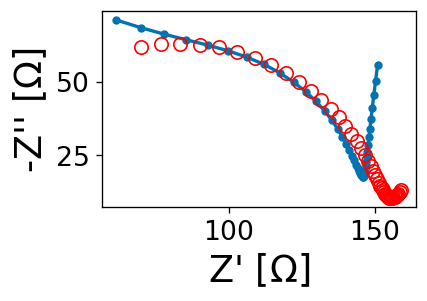

In [6]:
masked_mpt.mpt_plot(fitting = 'on')

No handles with labels found to put in legend.
70.02326903042805
-61.892139003796714
76.6320760253992
-62.770240066544375
83.34796081554437
-63.02922695225887
90.04707337042765
-62.65875937806381
96.60427642213565
-61.67897308893001
102.90462216258496
-60.138852855980005
108.85142580067848
-58.110991678233326
114.37779275135097
-55.68110169516798
119.43255712600009
-52.9461812069206
123.99397409112711
-50.00172018337712
128.06135968175536
-46.93734789597744
131.6528794553326
-43.83090282523966
134.7952569995018
-40.75093947639713
137.52649409969482
-37.74998558423051
139.8858285745545
-34.871082725173295
141.92015614342216
-32.137601487392345
143.6671876623839
-29.573357287101523
145.16540661049982
-27.190607142114363
146.45087946811364
-24.993939474066913
147.5586854948096
-22.977884114012884
148.51363690182535
-21.145095254484502
149.34163322992336
-19.487495222477676
150.06437031867262
-17.996863227919928
150.69964685243892
-16.66592288158087
151.2636542224283
-15.48484186650021
151

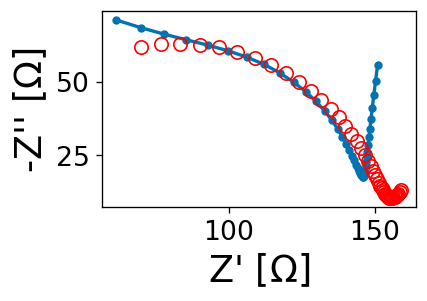

In [21]:
mpt_plot(self = masked_mpt, fitting = 'on')